# Unit Tests for the ancIBD package
Run these before uploading your package - to ensure everything works as intented.

In [2]:
import sys as sys
import matplotlib.cm as cm
import pandas as pd
import numpy as np

### The following code gives nice and clean Arial font on your plots
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'   # Set the defaul
rcParams['font.sans-serif'] = ['Arial']

### Set development package first in path [comment out for installed version]
#sys.path.insert(0,"/mnt/archgen/users/hringbauer/git/hapBLOCK/package/")

### Test imports

In [19]:
from ancIBD.IO.prepare_h5 import vcf_to_1240K_hdf
from ancIBD.run import run_plot_pair
from ancIBD.run import hapBLOCK_chroms
from ancIBD.plot.plot_karyotype import plot_karyo_from_ibd_df
from ancIBD.plot.plot_karyotype import plot_pde_individual_from_ibd_df

# Define Unit Tests

In [20]:
def check_IBD_on_chromosome():
    """Run IBD between two IIDs with known long IBD on one Chromosome."""


    df_ibd = hapBLOCK_chroms(folder_in="/mnt/archgen/ibd_release/data/h5.master/v12.0/ch",
                             iids=["KFJ018", "KFJ040"], run_iids=[],
                             ch=1, folder_out='',
                             output=True, prefix_out='', logfile=False,
                             l_model='h5', e_model='haploid_gl2', h_model='FiveStateScaled', t_model='standard',
                             ibd_in=1, ibd_out=10, ibd_jump=400,
                             min_cm=6, cutoff_post=0.99, max_gap=0.0075)

    m = np.max(df_ibd["lengthM"])
    print(f"Longest IBD: {m:.4f} Morgan")
    assert(np.isclose(m, 1.017, atol=0.01))
    return 0

def check_plot_data():
    run_plot_pair(iids=["KFJ018", "KFJ040"], ch=5, plot=True, xlim=[],
                  path_h5 = "/mnt/archgen/ibd_release/data/h5.master/v12.0/ch",
                  min_cm=6, p_col='variants/AF_ALL', ms=1.5,
                  l_model='h5', 
                  path_fig="", fs_l=16, figsize=(8,2))
    return 0

def check_karyo_plot():
    path_ibd = "/mnt/archgen/ibd_release/v12.0/ibd220f.ibd.12.0.tsv"
    df_ibd = pd.read_csv(path_ibd, sep="\t")
    
    plot_karyo_from_ibd_df(df_ibd, iids=["KFJ018", "KFJ040"], min_cm=8, 
                           savepath="/mnt/archgen/users/hringbauer/git/hapBLOCK/figs/unittests/karyo.png",
                           title = "KFJ018 - KFJ040")
    return 0

def test_histo_plot():
    path_ibd = "/mnt/archgen/ibd_release/v12.0/ibd220f.ibd.12.0.tsv"
    df_ibd = pd.read_csv(path_ibd, sep="\t")
    
    plot_pde_individual_from_ibd_df(df_ibd, iids=["KFJ018", "KFJ040"],
                                    savepath="/mnt/archgen/users/hringbauer/git/hapBLOCK/figs/unittests/ibd_histo.png", 
                                    title="KFJ018 - KFJ040", comm_ancs=[4, 4, 2, 2], ms=[4, 6, 5, 4],
                                    labels=['First Cousins', 'Second Cousins', '5 generations anc.', '4 generations anc.'],)
    return 0


# A) Preparing an HDF5 from HDF5
Test whether creating the data works

### TODO: Needs update for Leipzig

In [3]:
%%time
ch = 22

base_path = f"/n/groups/reich/hringbauer/git/hapBLOCK/"
vcf_to_1240K_hdf(in_vcf_path = base_path + f"notebook/vignette/data/example_hazelton_chr{ch}.vcf",
                 path_vcf = base_path + f"output/dumpster/unittests/example_hazelton_chr{ch}.vcf",
                 path_h5 =  base_path + f"output/dumpster/unittests/example_hazelton_chr{ch}.h5",
                 marker_path = base_path + f"notebook/vignette/data/filters/snps_bcftools_ch{ch}.csv",
                 map_path = base_path + f"notebook/vignette/data/v51.1_1240k.snp", 
                 af_path = base_path + f"notebook/vignette/data/afs/v51.1_1240k_AF_ch{ch}.tsv",
                 col_sample_af = "", 
                 buffer_size=20000, chunk_width=8, chunk_length=20000,
                 ch=ch)

print(f"Finished running chromosome {ch}")

Print downsampling to 1240K...
Finished BCF tools filtering.
Deleting previous HDF5 file at path_h5: /n/groups/reich/hringbauer/git/hapBLOCK/output/dumpster/unittests/example_hazelton_chr22.h5...
Converting to HDF5...
Finished conversion to hdf5!
Merging in LD Map..
Lifting LD Map from eigenstrat to HDF5...
Loaded 15483 variants.
Loaded 6 individuals.
Loaded 16420 Chr.22 1240K SNPs.
Intersection 15408 out of 15483 HDF5 SNPs
Interpolating 75 variants.
Finished Chromosome 22.
Adding map to HDF5...
Intersection 15408 out of 15483 target HDF5 SNPs. 75 SNPs set to AF=0.5
Transformation complete! Find new hdf5 file at: /n/groups/reich/hringbauer/git/hapBLOCK/output/dumpster/unittests/example_hazelton_chr22.h5

Finished running chromosome 22
CPU times: user 9 s, sys: 897 ms, total: 9.89 s
Wall time: 10.6 s


# B) Running ancIBD
Test whether running on the data works

In [8]:
check_IBD_on_chromosome()

Thresholding GP at 0.999
Attention: Some data in GP field is missing. Ideally, all GP entries are set.
Minimum Genetic Map: 0.0201 Morgan
Maximum Genetic Map: 2.8627 Morgan
Gaps bigger than 0.1 cM: 254
Maximum Gap: 2.9226 cM
Upper Gap Cutoff: 5.0000 cM
HMM State Number: 4
Memory Usage at end of HMM:
Memory Usage: 302.8992 mB
Fraction Markers above IBD cutoff: 0.7188
Merged n=0 gaps < 0.0075 M
Called n=1 IBD Blocks > 6 cM
Longest Block: 101.68 cM
Longest IBD: 1.0168 Morgan


0

# C) Plotting the data
Test whether the plotting functions work

Attention: Some data in GP field is missing. Ideally, all GP entries are set.
Filtering to 0.99 GP variants: 0.901x
Filtering to 0.99 GP variants: 0.872x
Filtering to common GP variants: 0.846x
Plotting 68491 markers


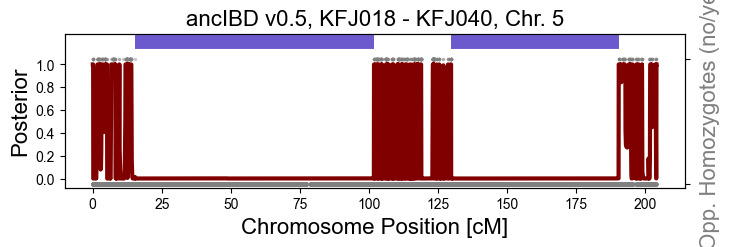

0

In [14]:
check_plot_data()

### C2) Test Karyotype Plot

Found: 27 Pairs fitting in dataframe.

Saved figure to /mnt/archgen/users/hringbauer/git/hapBLOCK/figs/unittests/karyo.png


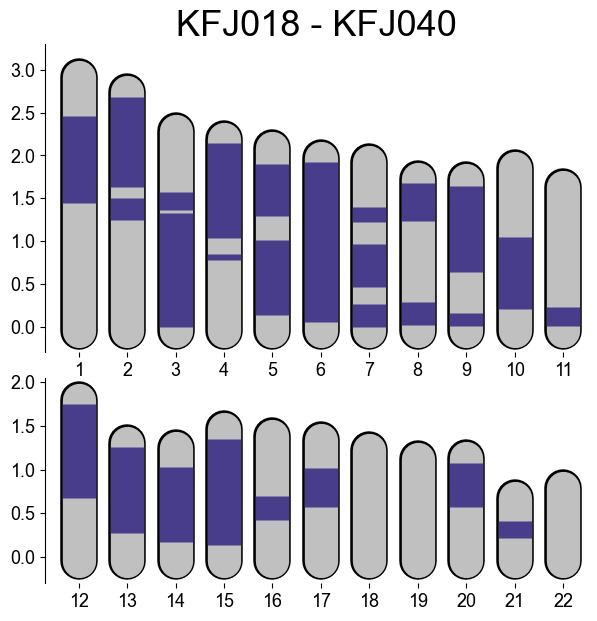

In [18]:
check_karyo_plot()

### C3) Test IBD Distribution

Found: 27 Pairs fitting in dataframe.

Saved to /mnt/archgen/users/hringbauer/git/hapBLOCK/figs/unittests/ibd_histo.png.


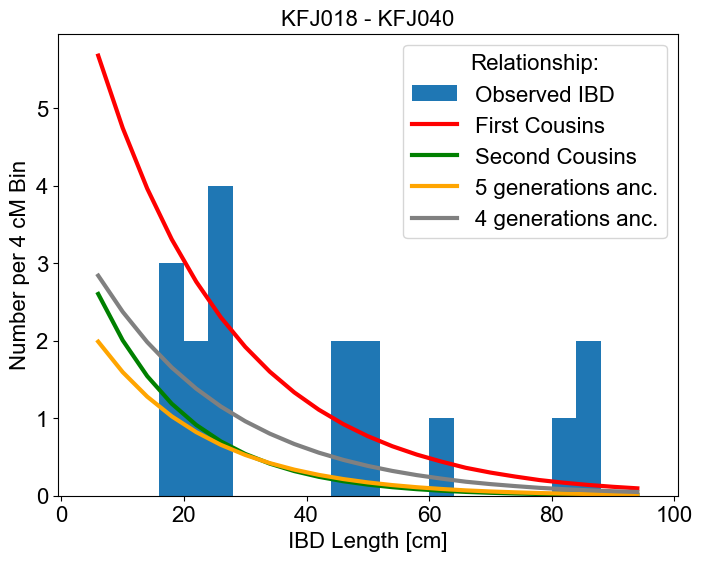

0

In [21]:
test_histo_plot()

### D) Test BASH installations

In [1]:
!ancIBDX -h
print("Test Successful.")

/bin/bash: line 1: ancIBDX: command not found
Test Successful.


#  Area 51